# **I want mention why i am late my google colab is continue to crash i really tired try with it to work**

---



# **Random Forest for regression**

Assignment Overview
This assignment is important for you to demonstrate your ability to utilize the Random Forests model for classification and regression and compare your results on train and test data.



---

Requirements:
* Download the following datasets and perform the necessary preprocessing depending on the task assigned to the dataset.
 * Bank Marketing Dataset (Classification, target = "bank term deposit")
 * U.S. Pollution Dataset (Regression, target = "CO AQI")
* Perform EDA on both datasets
* Create a Random Forest model for each dataset
* Report appropriate evaluation metrics for each model
* Compare the results of your models on the test data to the results on your train data and baseline models

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix


# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

#plt.style.use("seaborn")

In [3]:
US_Pollutiondf = pd.read_csv('/content/pollution_us_2000_2016.csv')
US_Pollutiondf.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [4]:
US_Pollutiondf.shape

(1746661, 29)

In [5]:
US_Pollutiondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [6]:
US_Pollutiondf.dtypes

Unnamed: 0             int64
State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

In [7]:
# Number of Unique values in each columns.
US_Pollutiondf.nunique()

Unnamed: 0           134576
State Code               47
County Code              73
Site Num                110
Address                 204
State                    47
County                  133
City                    144
Date Local             5996
NO2 Units                 1
NO2 Mean              31859
NO2 1st Max Value       990
NO2 1st Max Hour         24
NO2 AQI                 129
O3 Units                  1
O3 Mean                8196
O3 1st Max Value        134
O3 1st Max Hour          24
O3 AQI                  125
SO2 Units                 1
SO2 Mean              12736
SO2 1st Max Value       921
SO2 1st Max Hour         24
SO2 AQI                 140
CO Units                  1
CO Mean               34123
CO 1st Max Value       2698
CO 1st Max Hour          24
CO AQI                  107
dtype: int64

In [8]:
US_Pollutiondf.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [9]:
US_Pollutiondf.isnull().sum()

Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [10]:
US_Pollutiondf.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [11]:
# To check duplicated values 
print(US_Pollutiondf.duplicated().value_counts()) 

False    1746661
dtype: int64


In [12]:
US_Pollutiondf.dtypes

Unnamed: 0             int64
State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

In [13]:
var_categorical = ["State", "County", "City", "Date Local"]
var_numerical = ["NO2 Mean", "NO2 1st Max Value","NO2 1st Max Hour","NO2 AQI", "O3 Mean", "O3 1st Max Value", 
                 "O3 1st Max Hour","O3 AQI","SO2 Mean","SO2 1st Max Value","SO2 1st Max Hour","SO2 AQI","CO Mean",
                 "CO 1st Max Value","CO 1st Max Hour","CO AQI"]
print(len(var_categorical), len(var_numerical))

4 16


# **EDA**
# **Exploratory Data Analysis**

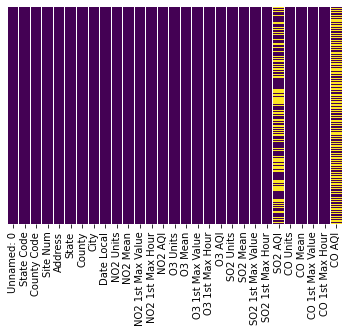

In [ ]:
sns.heatmap(US_Pollutiondf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

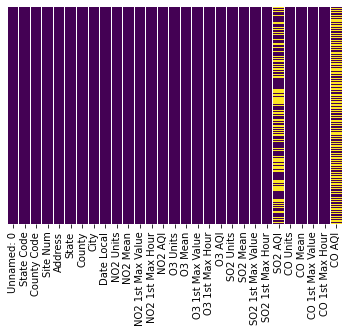

In [ ]:
sns.heatmap(US_Pollutiondf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

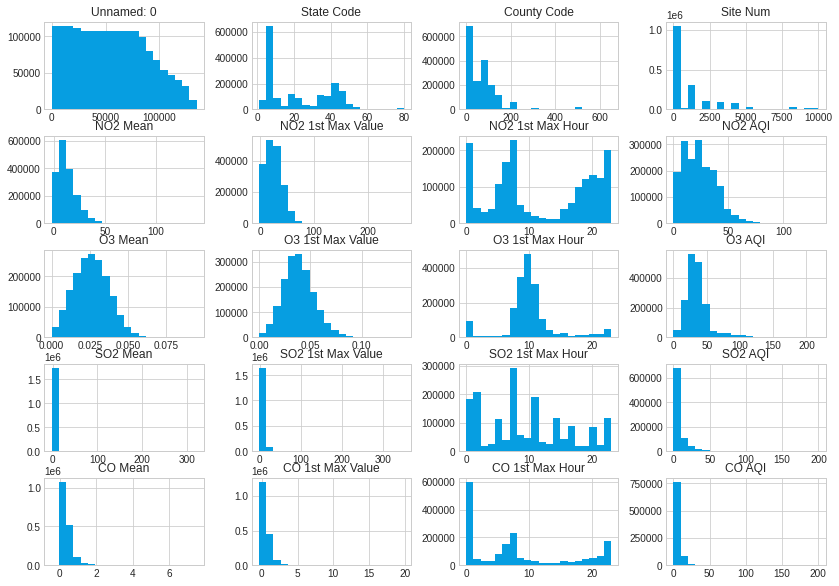

In [ ]:
plt.style.use('seaborn-whitegrid')

US_Pollutiondf.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

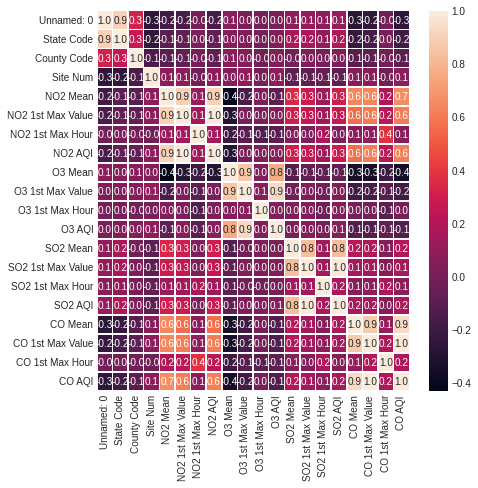

In [ ]:
#heatmap for dataset
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(US_Pollutiondf.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

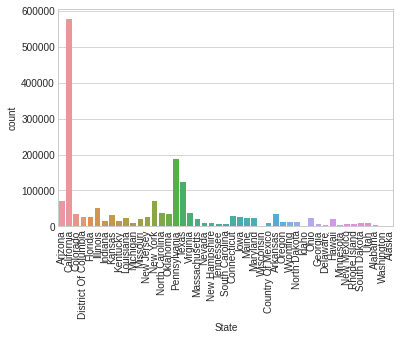

In [ ]:
sns.countplot(x='State',data=US_Pollutiondf)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132]), <a list of 133 Text major ticklabel objects>)

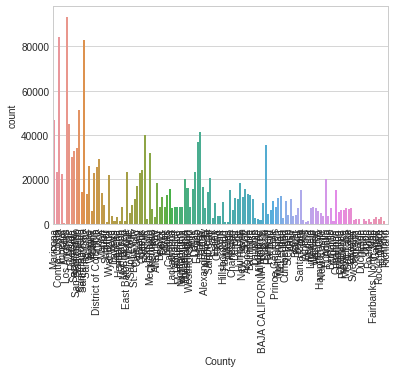

In [ ]:
sns.countplot(x='County',data=US_Pollutiondf)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143]), <a list of 144 Text major ticklabel objects>)

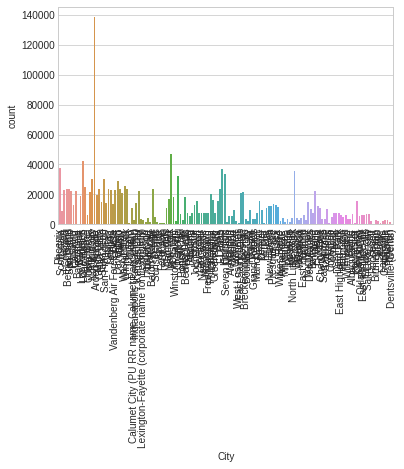

In [ ]:
sns.countplot(x='City',data=US_Pollutiondf)
plt.xticks(rotation=90)

(array([   0,    1,    2, ..., 5993, 5994, 5995]),
 <a list of 5996 Text major ticklabel objects>)

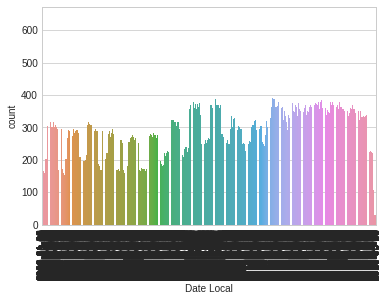

In [ ]:
sns.countplot(x='Date Local',data=US_Pollutiondf)
plt.xticks(rotation=90)

In [ ]:
#salaries_sm = scatter_matrix(US_Pollutiondf[["NO2 Mean", "NO2 1st Max Value","NO2 1st Max Hour","NO2 AQI", "O3 Mean", "O3 1st Max Value", "O3 1st Max Hour","O3 AQI","SO2 Mean","SO2 1st Max Value","SO2 1st Max Hour","SO2 AQI","CO Mean","CO 1st Max Value","CO 1st Max Hour","CO AQI"]])

# **Preprocessing, Data Cleaning, and Feature Engineering**

**Removing all the unnecessary columns**

In [13]:
US_Pollutiondf = US_Pollutiondf.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
US_Pollutiondf.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


**Drop missing values**

In [14]:
US_Pollutiondf =  US_Pollutiondf.dropna(axis=0)

**remove duplicated values**

In [15]:
US_Pollutiondf = US_Pollutiondf.drop_duplicates()
US_Pollutiondf = US_Pollutiondf.drop_duplicates()

In [16]:
# To check duplicated values 
print(US_Pollutiondf.duplicated().value_counts()) 

False    435551
dtype: int64


**One Hot Encoding**

In [ ]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["State", "County", "City", "Date Local"]

# One Hot encode the column data sets
one_hot_US = one_hot.fit_transform(US_Pollutiondf[col_names]).toarray()

In [ ]:
# Look at the categories
one_hot.categories_

In [ ]:
one_hot_US

In [ ]:
one_hot.categories_[0]

In [ ]:
one_hot.categories_[1]

In [ ]:
one_hot.categories_[2]

In [ ]:
one_hot.categories_[3]

In [ ]:
col_names

In [ ]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

In [ ]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["State", "County", "City", "Date Local"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [ ]:
one_hot_US.shape

In [ ]:
one_hot_US

In [ ]:
# Cast One Hot Encoded values into a dataframe

oheboheUSPopdfankdf= pd.DataFrame(
    one_hot_bank,
    index=US_Pollutiondf.index,
    columns = column_names
)

print(oheUSPopdf.shape)

In [ ]:
oheUSPopdf.head()

In [ ]:
merged = pd.concat([US_Pollutiondf,oheUSPopdf],axis='columns')
print(merged.shape)

In [ ]:
merged.head()

In [ ]:
US_Pollutiondf_new = merged.drop(["State", "County", "City", "Date Local"], axis='columns')
US_Pollutiondf_new

# **Split Data Into Train and Test**

In [ ]:
# We will divide the training and testing set in 80% and 20% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set
df_train, df_test = train_test_split(US_Pollutiondf, train_size = 0.8, random_state = 100)

In [ ]:
print("Train Dataset: "+ str(len(df_train)) + " Test Dataset: " + str(len(df_test)))
print("Train Target Label counts: ")
print(df_train["CO AQI"].value_counts())
print("Test Target Label counts: ")
print(df_test["CO AQI"].value_counts())

Train Dataset: 348440 Test Dataset: 87111
Train Target Label counts: 
3.0      58111
2.0      56925
5.0      45612
6.0      34960
1.0      25852
         ...  
150.0        1
88.0         1
85.0         1
143.0        1
135.0        1
Name: CO AQI, Length: 103, dtype: int64
Test Target Label counts: 
3.0      14489
2.0      14109
5.0      11601
6.0       8622
1.0       6461
         ...  
173.0        1
72.0         1
58.0         1
82.0         1
63.0         1
Name: CO AQI, Length: 77, dtype: int64


In [ ]:
# MinMaxScaler Object
scaler = MinMaxScaler()

In [ ]:
# Fit and Transform the data
# Fit will calculate our Min and Max values
# Transform will operate on standardisation function and scales our values
df_train[var_numerical] = scaler.fit_transform(df_train[var_numerical])

In [ ]:
# Transform will operate on standardisation function and scales our values
df_test[var_numerical] = scaler.transform(df_test[var_numerical])

In [ ]:
df_train.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1094303,California,Los Angeles,Los Angeles,2011-07-03,0.146482,0.143494,1.000000,0.257576,0.309814,0.411348,0.391304,0.224771,0.006247,0.005949,0.260870,0.000,0.096194,0.050633,0.478261,0.029851
1665422,Louisiana,East Baton Rouge,Baton Rouge,2015-05-01,0.075920,0.081784,0.260870,0.143939,0.496934,0.432624,0.391304,0.325688,0.008934,0.016147,0.739130,0.020,0.072939,0.031646,0.000000,0.009950
240226,Michigan,Kent,Grand Rapids,2002-05-19,0.107448,0.126394,0.086957,0.227273,0.272572,0.255319,0.434783,0.142202,0.010171,0.011331,0.652174,0.015,0.080867,0.050633,0.173913,0.029851
407657,Kansas,Wyandotte,Kansas City,2004-07-31,0.091551,0.171004,0.000000,0.318182,0.365028,0.375887,0.478261,0.206422,0.010171,0.016997,0.739130,0.030,0.121036,0.075949,0.000000,0.049751
584466,Massachusetts,Suffolk,Boston,2006-10-23,0.143362,0.133829,0.260870,0.242424,0.088081,0.092199,0.000000,0.050459,0.011459,0.014164,0.478261,0.020,0.093552,0.050633,0.434783,0.029851


In [ ]:
df_test.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1591892,Virginia,Henrico,East Highland Park,2014-04-19,0.040153,0.034201,0.869565,0.053030,0.451364,0.375887,0.478261,0.224771,0.008845,0.015581,0.173913,0.020,0.072939,0.031646,0.000000,0.009950
1117959,California,Solano,Vallejo,2011-02-24,0.103789,0.105204,0.826087,0.189394,0.330143,0.262411,1.000000,0.142202,0.009301,0.011048,0.347826,0.005,0.083418,0.044304,0.869565,0.024876
1092727,California,Imperial,Calexico,2011-10-25,0.093689,0.144981,0.304348,0.265152,0.249782,0.226950,0.391304,0.123853,0.006717,0.008499,0.260870,0.005,0.174419,0.107595,0.434783,0.079602
774176,California,San Bernardino,Victorville,2008-05-20,0.094610,0.100372,0.260870,0.181818,0.633215,0.531915,0.434783,0.458716,0.008061,0.008499,0.000000,0.005,0.069239,0.031646,0.000000,0.009950
1188071,Texas,El Paso,El Paso,2011-06-20,0.063621,0.069888,0.260870,0.113636,0.468454,0.368794,0.521739,0.201835,0.007635,0.008215,0.826087,0.000,0.049154,0.025316,0.434783,0.004975


**Dividing into X and Y sets for the model building**

In [ ]:
# Divide the train data into X and y

y_train = df_train.pop('CO AQI')
X_train = df_train

In [ ]:
# Divide the test data into X and y

y_test = df_test.pop('CO AQI')
X_test = df_test

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((348440, 19), (348440,), (87111, 19), (87111,))

## Random Forest For Regression


In [ ]:
reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion = 'mse')

reg_forest.fit(X_train, y_train)

preds_forest = reg_forest.predict(X_test)

mean_absolute_error(y_true=y_test, y_pred=preds_forest)


ValueError: ignored

In [ ]:
reg_forest.feature_importances_

array([0.04709047, 0.18209682, 0.54056273, 0.02373774, 0.12363085,
       0.0828814 ])

In [ ]:
X_train.columns

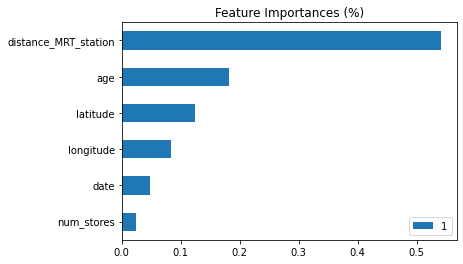

In [ ]:
# Plot Feature Importances to Visualize better

pd.DataFrame(dict(zip(X_train.columns, reg_forest.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

#### Grid Search for Regression

[Scikit-learn Documentation for Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV)

In [ ]:
# Regression

param_grid2 = {
    "n_estimators": [5,7,10, 15], # how many trees in our forest
    "max_depth": [2,4,6] # how deep each decision tree can be
    
}

grid2 = GridSearchCV(
    reg_forest,
    param_grid2,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

grid2.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [5, 7, 10, 15]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
grid_df = pd.DataFrame(grid2.cv_results_)

grid_df 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007218,0.000847,0.001928,0.000748,2,5,"{'max_depth': 2, 'n_estimators': 5}",-5.995250,-5.475716,-5.039299,-5.960841,-6.473998,-5.789021,0.490202,10
1,0.009471,0.001801,0.002152,0.001044,2,7,"{'max_depth': 2, 'n_estimators': 7}",-5.930534,-5.719770,-5.041397,-6.043809,-6.373845,-5.821871,0.443915,12
2,0.010770,0.002636,0.001616,0.000100,2,10,"{'max_depth': 2, 'n_estimators': 10}",-5.789802,-5.708260,-4.949772,-6.137279,-6.378424,-5.792707,0.485690,11
3,0.013315,0.002565,0.002617,0.001924,2,15,"{'max_depth': 2, 'n_estimators': 15}",-5.993104,-5.454911,-4.962218,-6.179518,-6.273120,-5.772574,0.494443,9
4,0.007644,0.003192,0.001281,0.000070,4,5,"{'max_depth': 4, 'n_estimators': 5}",-5.902535,-5.875899,-5.242041,-4.957948,-6.166971,-5.629079,0.452823,8
5,0.008959,0.002696,0.001377,0.000073,4,7,"{'max_depth': 4, 'n_estimators': 7}",-5.627426,-5.962439,-5.184828,-4.906057,-6.170067,-5.570163,0.470439,7
6,0.010331,0.001064,0.003439,0.002868,4,10,"{'max_depth': 4, 'n_estimators': 10}",-5.441067,-5.631865,-4.856718,-5.099669,-6.091516,-5.424167,0.428037,3
7,0.018445,0.004566,0.001680,0.000046,4,15,"{'max_depth': 4, 'n_estimators': 15}",-5.600712,-5.496150,-4.867289,-5.212310,-5.948095,-5.424911,0.364923,4
8,0.007471,0.002399,0.001237,0.000066,6,5,"{'max_depth': 6, 'n_estimators': 5}",-5.485309,-6.033883,-5.340554,-4.783636,-5.645483,-5.457773,0.408925,6
9,0.009209,0.002069,0.001331,0.000065,6,7,"{'max_depth': 6, 'n_estimators': 7}",-5.118708,-6.244847,-5.378412,-4.863412,-5.633675,-5.447811,0.474227,5


In [ ]:
parameters = ['param_max_depth','param_n_estimators','mean_test_score','rank_test_score']

grid_df[parameters]

,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
0,2,5,-5.789021,10
1,2,7,-5.821871,12
2,2,10,-5.792707,11
3,2,15,-5.772574,9
4,4,5,-5.629079,8
5,4,7,-5.570163,7
6,4,10,-5.424167,3
7,4,15,-5.424911,4
8,6,5,-5.457773,6
9,6,7,-5.447811,5


In [ ]:
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
11,6,15,-5.297018,1
10,6,10,-5.313242,2
6,4,10,-5.424167,3
7,4,15,-5.424911,4
9,6,7,-5.447811,5
8,6,5,-5.457773,6
5,4,7,-5.570163,7
4,4,5,-5.629079,8
3,2,15,-5.772574,9
0,2,5,-5.789021,10


In [ ]:
grid2.best_score_

-5.297018298713607

In [ ]:
grid2.best_params_

{'max_depth': 6, 'n_estimators': 15}

In [ ]:
grid2.best_estimator_.estimators_

[DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=209652396),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=398764591),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=924231285),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1478610112),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=441365315),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1537364731),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=192771779),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1491434855),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1819583497),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=530702035),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=626610453),
 DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1650906866),
 DecisionTr

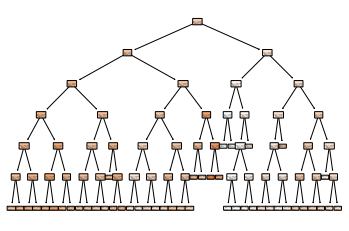

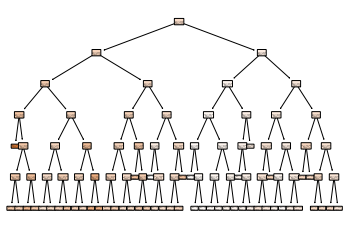

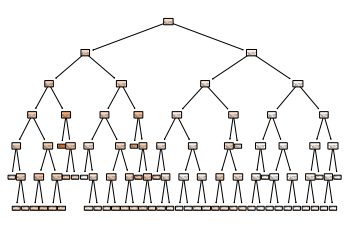

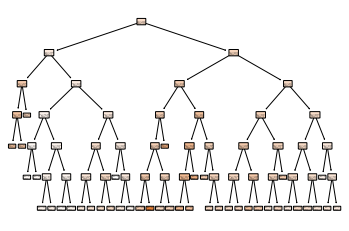

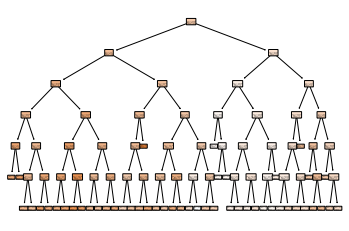

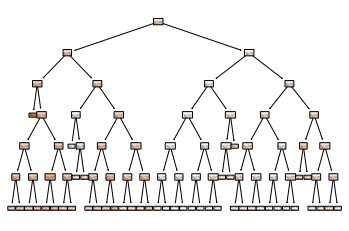

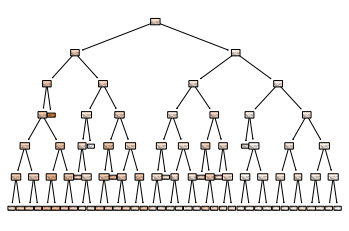

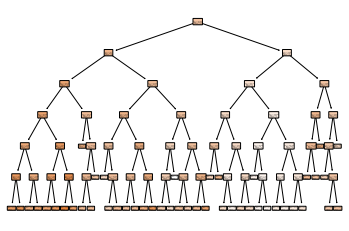

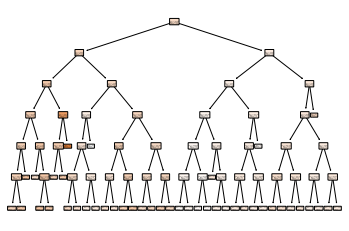

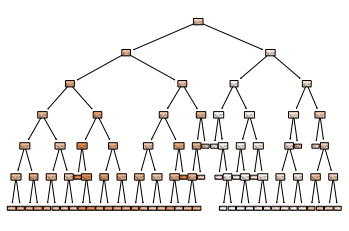

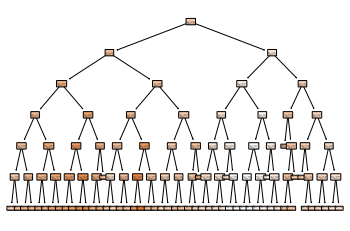

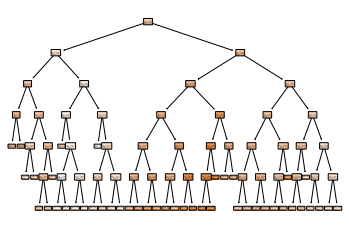

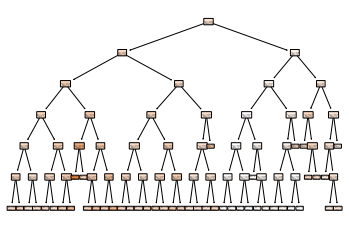

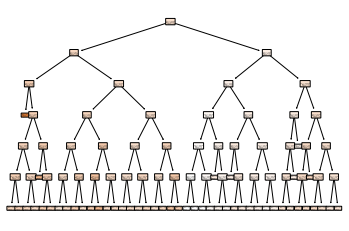

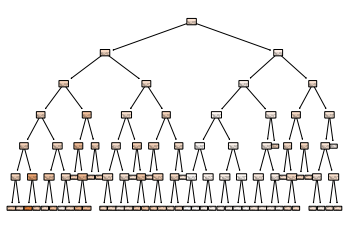

In [ ]:
# Plot the Decision Trees from the Grid Search Random Forest

for x in range(len(grid2.best_estimator_.estimators_)):
    tree.plot_tree(
    grid2.best_estimator_.estimators_[x], # Access each individual estimator
    filled=True,
    rounded=True,
    )
    plt.show()